# **Predicting Credit Card Approvals**

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics

## loading the data

In [103]:
# load the file
data = pd.read_csv("/content/drive/MyDrive/bonus-project/cc_approvals.data")

In [104]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


## description and summary information of data

In [105]:
# description and summary information of credit card approvals data
data.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## checking about null values

In [107]:
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

## visualization of categorical features

Text(0.5, 1.0, 'Citizen Distribution')

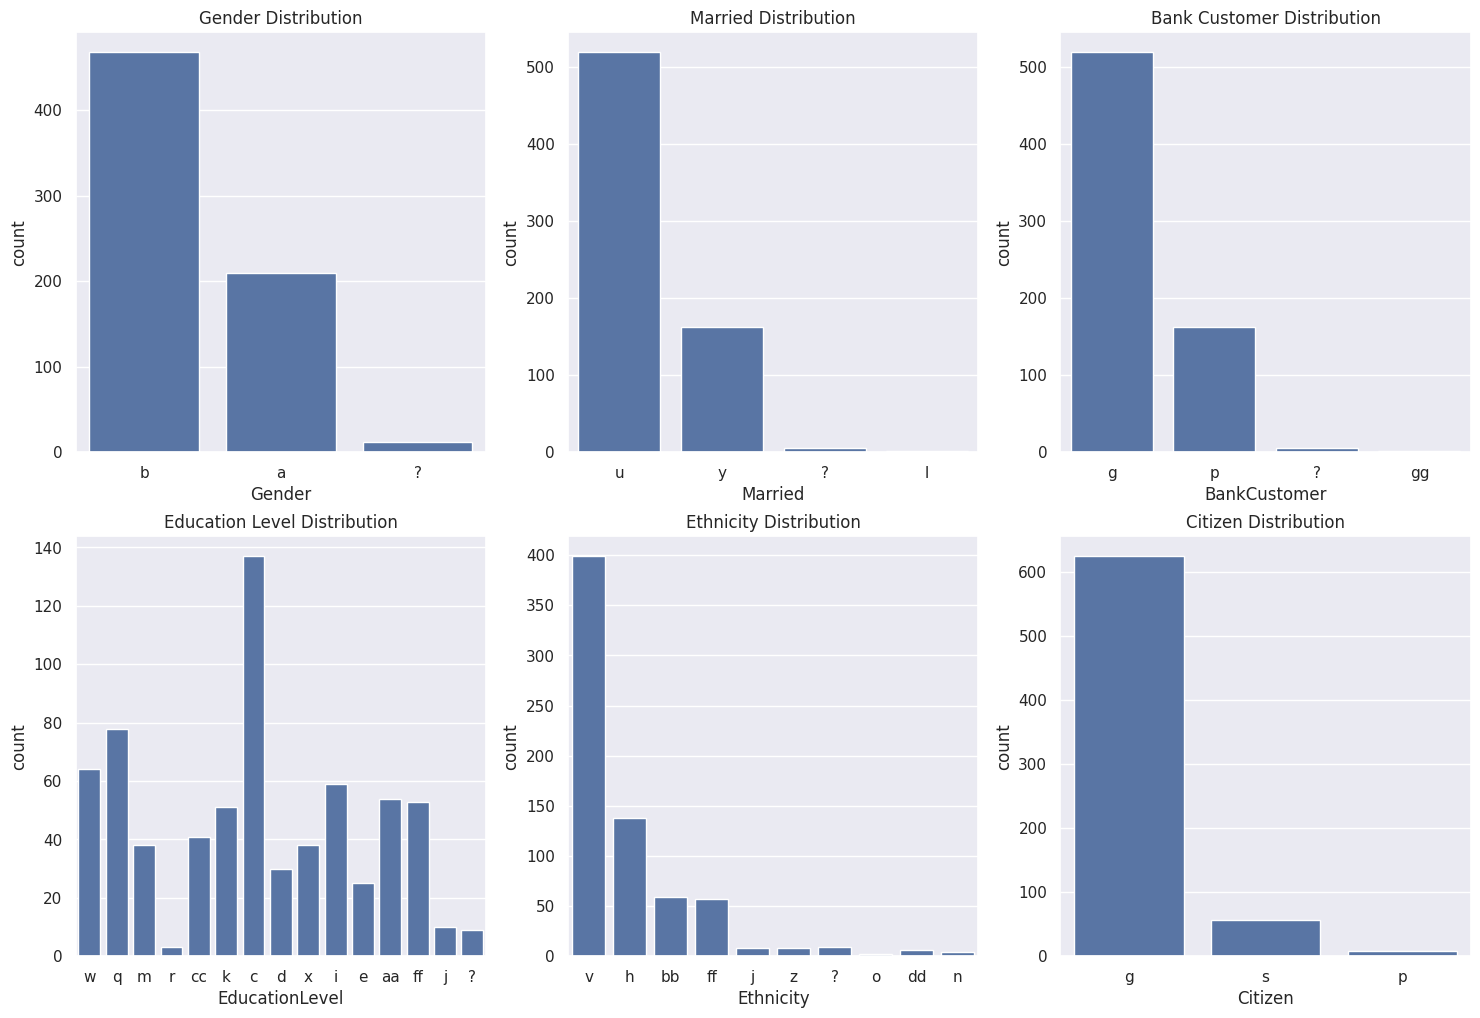

In [108]:
plt.figure(figsize=(18, 12))
# Gender
plt.subplot(2, 3, 1)
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')
# Married
plt.subplot(2, 3, 2)
sns.countplot(data=data, x='Married')
plt.title('Married Distribution')

# BankCustomer
plt.subplot(2, 3, 3)
sns.countplot(data=data, x='BankCustomer')
plt.title('Bank Customer Distribution')

# EducationLevel
plt.subplot(2, 3, 4)
sns.countplot(data=data, x='EducationLevel')
plt.title('Education Level Distribution')

# Ethnicity
plt.subplot(2, 3, 5)
sns.countplot(data=data, x='Ethnicity')
plt.title('Ethnicity Distribution')

# Citizen
plt.subplot(2, 3, 6)
sns.countplot(data=data, x='Citizen')
plt.title('Citizen Distribution')


## visualization of numerical features

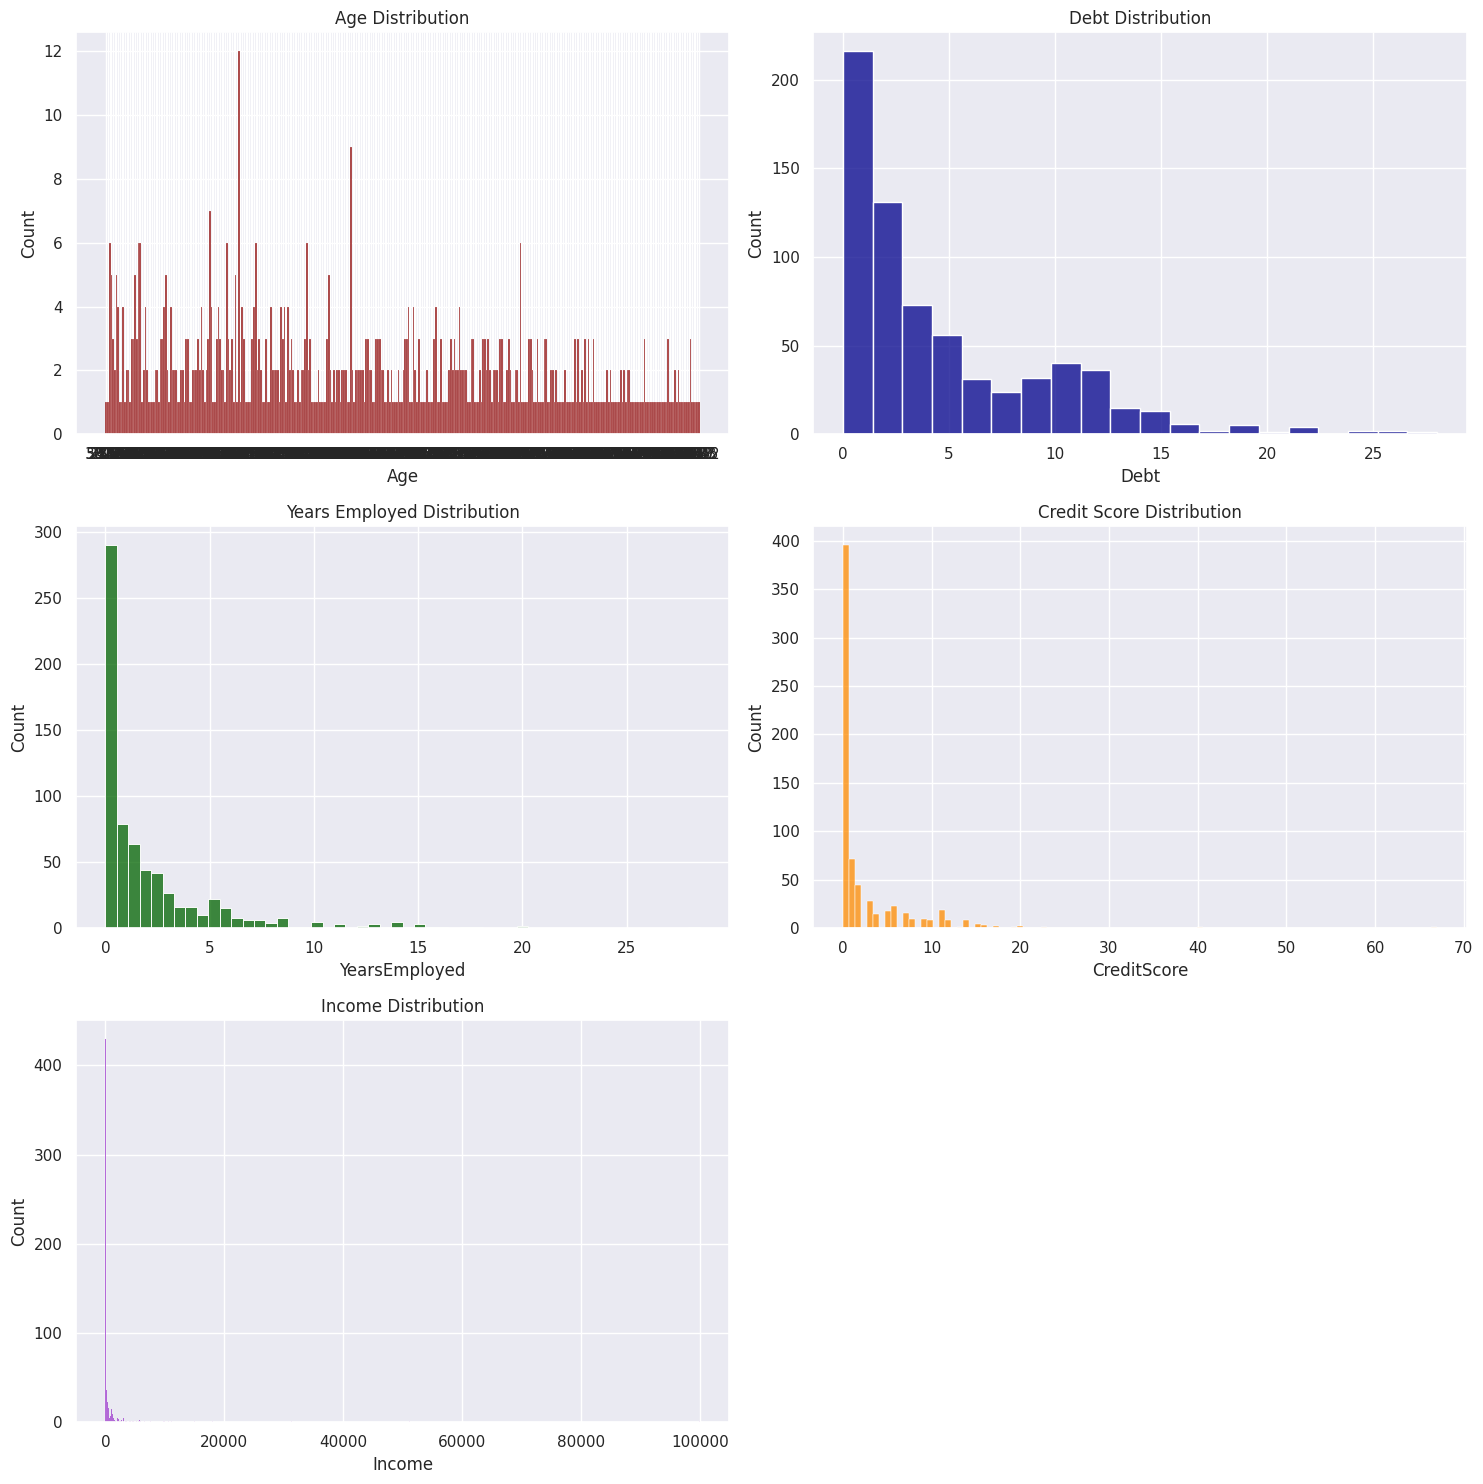

In [109]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Age
sns.histplot(data=data, x='Age', color='darkred', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Debt
sns.histplot(data=data, x='Debt', color='darkblue', ax=axes[0, 1])
axes[0, 1].set_title('Debt Distribution')

# YearsEmployed
sns.histplot(data=data, x='YearsEmployed', color='darkgreen', ax=axes[1, 0])
axes[1, 0].set_title('Years Employed Distribution')

# CreditScore
sns.histplot(data=data, x='CreditScore', color='darkorange', ax=axes[1, 1])
axes[1, 1].set_title('Credit Score Distribution')

# Income
sns.histplot(data=data, x='Income', color='darkorchid', ax=axes[2, 0])
axes[2, 0].set_title('Income Distribution')

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

## drop the column

In [110]:
# drop the column not relevant for credit card approvals prediction
data.drop(['DriversLicense', 'ZipCode'], axis=1, inplace=True)

## deal with missing data with requied values

In [111]:
# there are some missing values in the dataset, we can see in the vasualization features and in the form here
data.tail(20)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,g,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,g,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,g,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,g,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,g,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,g,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,g,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,g,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,g,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,g,0,-


In [112]:
# deal with missing values in the form of 0’s -- use mean imputation strategy
#“Debt”, “YearsEmployed”, “CreditScore”, and “Income”
# data[['Debt', 'YearsEmployed', 'CreditScore', 'Income']] = data[['Debt', 'YearsEmployed', 'CreditScore', 'Income']].replace(0, pd.NA)
# data[['Debt', 'YearsEmployed', 'CreditScore', 'Income']].isnull().sum()
data.replace(0, pd.NA, inplace=True)
data.isnull().sum()

Gender              0
Age                 0
Debt               19
Married             0
BankCustomer        0
EducationLevel      0
Ethnicity           0
YearsEmployed      70
PriorDefault        0
Employed            0
CreditScore       395
Citizen             0
Income            295
Approved            0
dtype: int64

In [113]:
# replace with mean
num_cols = ['Debt', 'YearsEmployed', 'CreditScore', 'Income']
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())
print(data.isnull().sum())

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
Approved          0
dtype: int64


In [114]:
# deal with missing values in the form of ? -- use mode imputation strategy
# “Gender”, “Age”, “Married”, “BankCustomer”, “EducationLevel”, and “Ethnicity”
data.replace('?', pd.NA, inplace=True)
data.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
Citizen            0
Income             0
Approved           0
dtype: int64

In [115]:
# replace with mode
for col in ['Gender', 'Age', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity']:
    data[col].fillna(data[col].mode()[0], inplace=True)
data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
Approved          0
dtype: int64

## Perform logistic regression over the given data to predict whether or not a given person’s loan will be approved

1. processing the data

In [116]:
# # encode the columns
# # one-hot encode the columns
# categorical_columns=['Gender','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','Citizen','Approved']
# data =pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# data.head()

# why choose label encode?
# faster computation and can fit more machine learning models which need numeric format data
# can preserve the intrinsic order of categorical variables in the data

# label encode the columns
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
lebal_encoder = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in data:
    # compare if the dtype is object
    if data[col].dtypes == 'object':
    # use LabelEncoder to do the numeric transformation
        lebal_encoder.fit(data[col])
        data[col] = lebal_encoder.transform(data[col])

data.head()


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,1,156,4.893472,1,0,12,7,1.25,1,1,1.000000,0,1777.205063,0
1,0,328,4.460000,1,0,10,3,3.04,1,1,6.000000,0,560.000000,0
2,0,89,0.500000,1,0,10,3,1.50,1,0,5.613559,0,824.000000,0
3,1,125,1.540000,1,0,12,7,3.75,1,1,5.000000,0,3.000000,0
4,1,43,5.625000,1,0,12,7,1.71,1,0,5.613559,2,1777.205063,0


2. split the data into training and testing sets

In [117]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
# split the target column
X = data.drop('Approved', axis=1)
y = data['Approved']
# split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# scaling the data
from sklearn.preprocessing import MinMaxScaler
# instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

## logistic regression

In [118]:
from sklearn.linear_model import LogisticRegression

log =LogisticRegression()
log.fit(rescaledX_train,y_train)

LogisticRegression()

## prediction model

In [119]:
# predictions
y_pred = log.predict(rescaledX_test)
# confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)

[[93 10]
 [27 98]]


In [120]:
# accuracy score
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)
print(score)

0.8377192982456141


In [121]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       103
           1       0.91      0.78      0.84       125

    accuracy                           0.84       228
   macro avg       0.84      0.84      0.84       228
weighted avg       0.85      0.84      0.84       228

